<center><font size="4">KNN on Vertebral Column Data</font></center>

<br>
Name: Chengyi Li
<br>
Github Username: ChengyiLi98

### (a) Download Data

Package imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the Vertebral Column Data Set

In [3]:
path = r'../data/vertebral_column_data/column_2C.dat'
df = pd.read_csv(path, sep=' ',header = None)
df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class_labels']
#df

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

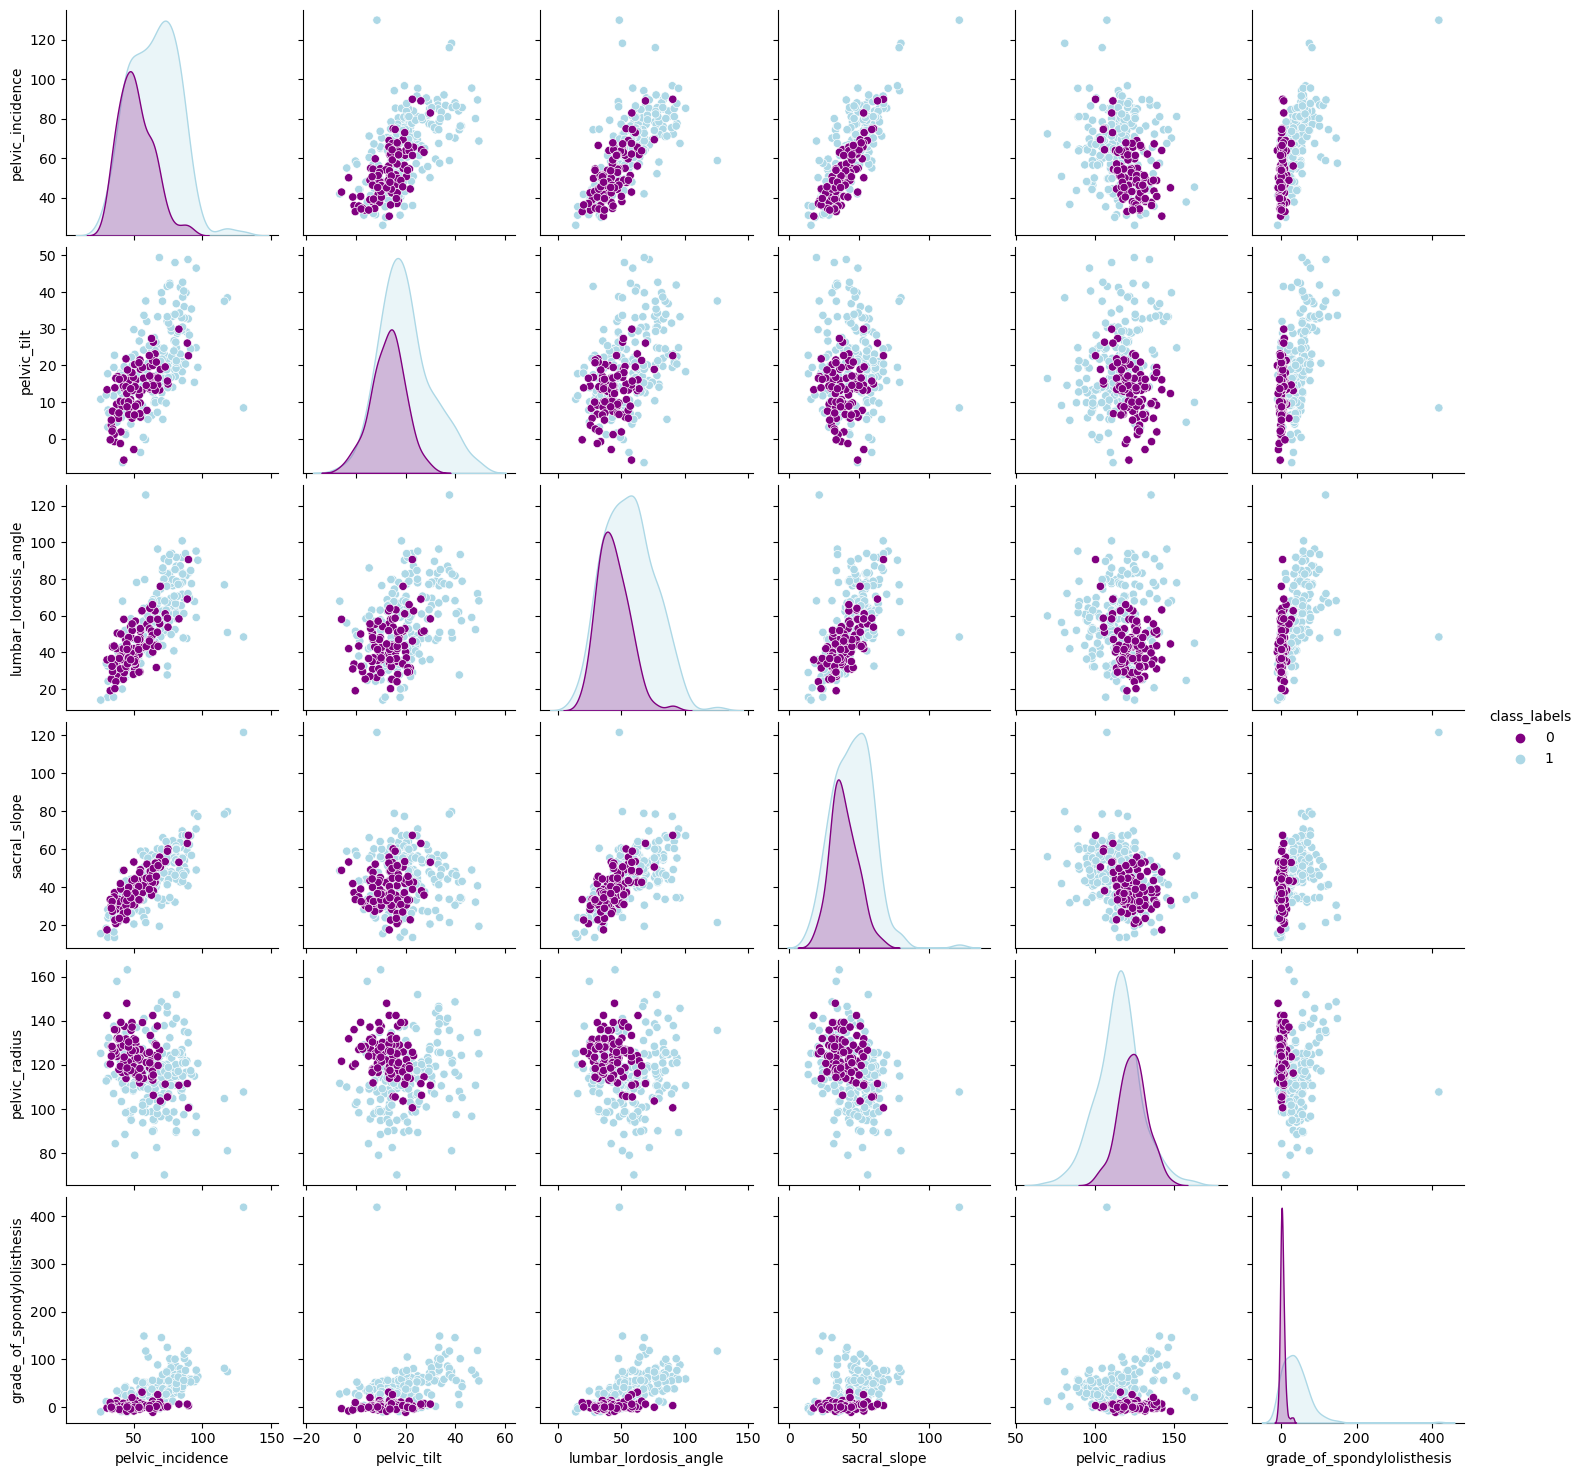

In [4]:
# binary classification NO=0 and AB=1
labels= {'NO': 0, 'AB': 1}
df['class_labels'] = df['class_labels'].map(labels)

# although in default settings, it already has two differnt colors, 
# I tried to change scatters to custom color
pal ={0:'purple',1:'lightblue'}
sns.pairplot(df,hue = 'class_labels',palette=pal)

#### ii. Boxplots

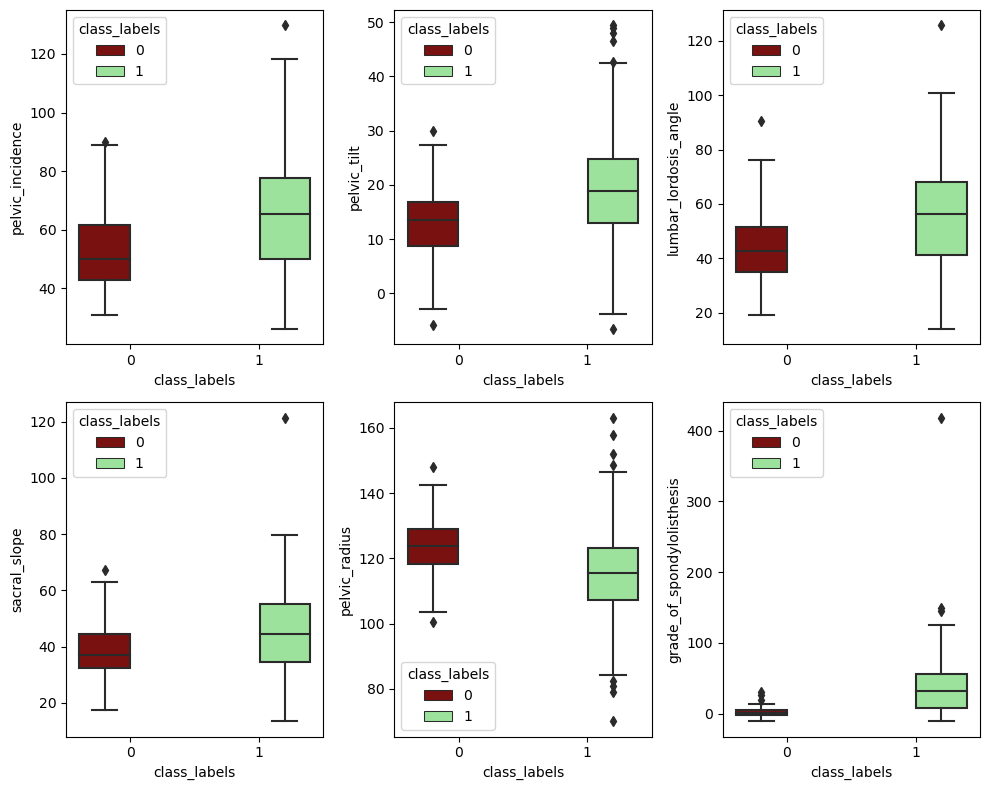

In [5]:
fig, axes = plt.subplots(2, 3, figsize = (10,8))

# Flatten the axes array to make it easier to access in the loop
axes = axes.flatten()

pal ={0:'darkred',1:'lightgreen'}

for i, col in enumerate(df.columns[:6]):
    sns.boxplot(data=df, x='class_labels', y=col, hue='class_labels', ax=axes[i], palette = pal)

plt.tight_layout()

#### iii. Split Data Set

In [6]:
data_0 = df[df['class_labels'] == 0]
data_1 = df[df['class_labels'] == 1]

train_set = pd.concat([data_0.head(70), data_1.head(140)],axis=0)
test_set = pd.concat([data_0.iloc[70:], data_1.iloc[140:]],axis=0)

### (c) Classification

#### i. Euclidean Metric

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score

#### ii. Test Data

The most suitable k is 4.
At this time, 
The confusion matrix of training set is :
[[ 64   6]
 [ 24 116]]
The confusion matrix of testing set is :
[[25  5]
 [ 1 69]]
The true positive rate is 0.9857142857142858.
The true negative rate is 0.8333333333333334.
The precision is 0.9324324324324325.
The F1-score is 0.9583333333333333.


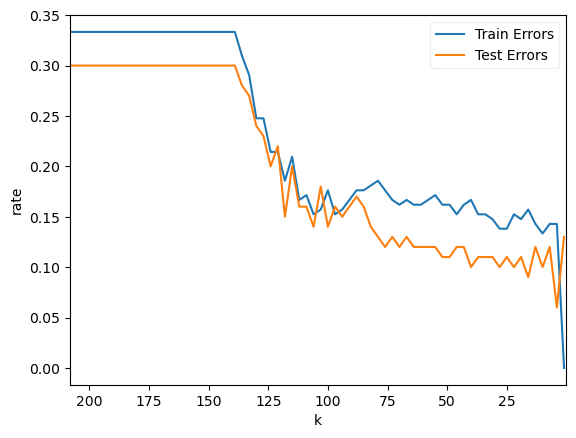

In [8]:
list_k = list(range(208, 0, -3))
train_errors = []
test_errors = []

X_train = train_set.iloc[:, :-1].values # select all rows and all columns except the last column
y_train = train_set.iloc[:, -1].values # selects all rows and only the last column
X_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, -1].values

for k in list_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_error = 1 - accuracy_score(y_train, knn.predict(X_train))
    test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
    train_errors.append(train_error)
    test_errors.append(test_error)

k_star = list_k[np.argmin(test_errors)] 

plt.plot(list_k, train_errors, label='Train Errors')
plt.xlim(max(list_k),min(train_errors))  # in reverse order
plt.plot(list_k, test_errors, label='Test Errors')
plt.xlim(max(list_k),min(test_errors))
plt.xlabel('k')
plt.ylabel('rate')
plt.legend(loc = 'best', framealpha = 0.3) 


knn_suitable = KNeighborsClassifier(n_neighbors=k_star)
knn_suitable.fit(X_train, y_train)

# confusion matrix

matrix_confusion_train =confusion_matrix(y_train, knn_suitable.predict(X_train)) 
matrix_confusion_test = confusion_matrix(y_test, knn_suitable.predict(X_test))

TN, FP, FN, TP =  matrix_confusion_test.ravel()  # flatten

#true positive rate
TPR = TP / (FN + TP) # TP/P

#true negative rate
FPR = TN / (TN + FP) # TN/N

#precision
precision = precision_score(y_test, knn_suitable.predict(X_test))

#F1-score 
F1_score = f1_score(y_test, knn_suitable.predict(X_test))


print('The most suitable k is {}.'.format(k_star))
print('At this time, ')
print('The confusion matrix of training set is :')
print(matrix_confusion_train)
print('The confusion matrix of testing set is :')
print(matrix_confusion_test)
print('The true positive rate is {}.'.format(TPR))
print('The true negative rate is {}.'.format(FPR))
print('The precision is {}.'.format(precision))
print('The F1-score is {}.'.format(F1_score))


#### iii. Learning Curve

The optimal k for N= 10 is 1 
The optimal k for N= 20 is 6 
The optimal k for N= 30 is 1 
The optimal k for N= 40 is 11 
The optimal k for N= 50 is 26 
The optimal k for N= 60 is 21 
The optimal k for N= 70 is 26 
The optimal k for N= 80 is 31 
The optimal k for N= 90 is 41 
The optimal k for N= 100 is 6 
The optimal k for N= 110 is 6 
The optimal k for N= 120 is 16 
The optimal k for N= 130 is 16 
The optimal k for N= 140 is 16 
The optimal k for N= 150 is 16 
The optimal k for N= 160 is 6 
The optimal k for N= 170 is 6 
The optimal k for N= 180 is 6 
The optimal k for N= 190 is 6 
The optimal k for N= 200 is 6 
The optimal k for N= 210 is 6 


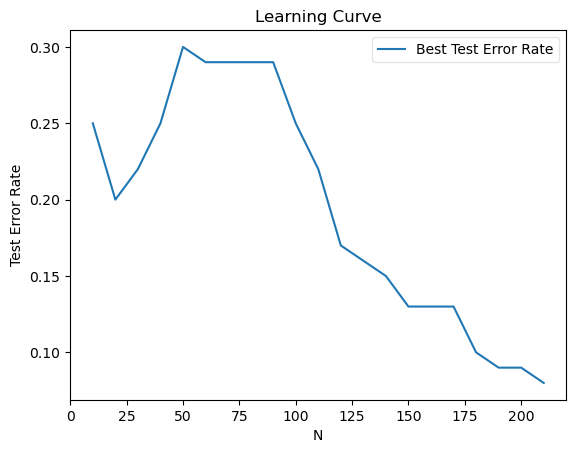

In [9]:
import math
# select your training set by choosing the first ⌊N/3⌋ rows of Class 0 
# and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii

optimal_k = 0
best_test_error_rate = 6.66 # default to be a float
train_error_rates = []
test_error_rates = []
best_test_error_rates = []
list_N = list(np.arange(10,211,10))

for N in list_N:
    best_test_error_rate = 6.66
    sub_train = pd.concat([data_0.head(math.floor(N/3)),data_1.head(N-math.floor(N/3))],axis=0)
    X_train = sub_train.iloc[:, :-1].values
    y_train = sub_train.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    y_test = test_set.iloc[:, -1].values
    
    for k in range(1, N, 5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_error_rate = 1 - accuracy_score(y_test, knn.predict(X_test))

        if test_error_rate < best_test_error_rate:
            optimal_k = k
            best_test_error_rate = test_error_rate
            
    best_test_error_rates.append(best_test_error_rate)
    print('The optimal k for N= {} is {} '.format(N,optimal_k))
            

plt.plot(list_N, best_test_error_rates, label='Best Test Error Rate')
plt.title('Learning Curve')
plt.xlabel('N')
plt.ylabel('Test Error Rate')
plt.legend(loc = 'best', framealpha = 0.5) 

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [10]:
# sum(|x - y|)
from sklearn.metrics import DistanceMetric

optimal_k = 0
best_test_error= 6.66 # default to be a float
test_errors = []

X_train = train_set.iloc[:, :-1].values
y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, -1].values

for k in range(1,201,5):
    # method = DistanceMetric.get_metric('minkowski', p=1)
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'manhattan')
    knn.fit(X_train,y_train)
    test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        optimal_k = k
        best_test_error = test_error

print('The best k is :', optimal_k)

The best k is : 6


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [11]:
optimal_k = 0
best_test_error= 6.66# default to be a float
test_errors = []
p_values = [0.1 * i for i in range(1, 11)]

for i in range(1,11):
    p = 10**(0.1*i)

    for k in range(1,201,5):
        knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski',p=p)
        knn.fit(X_train,y_train)
        test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
        test_errors.append(test_error)
        if test_error < best_test_error:
            optimal_k = k
            best_test_error = test_error

optimal_p =0
best_test_error= 6.66            
for i in range(1,11):
    p = 10**(0.1*i)
    # print(p)
    knn = KNeighborsClassifier(n_neighbors=6, metric = 'minkowski',p=p)
    knn.fit(X_train,y_train)
    test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        best_test_error = test_error
        optimal_p = p

value_p = round(math.log10(optimal_p),1)        
print('The best k is :', optimal_k)
print('The best log10(p) is : ',value_p)

The best k is : 6
The best log10(p) is :  0.6


##### C. Chebyshev Distance With p -> infinity.

In [12]:
optimal_k = 0
best_test_error= 6.66 # default to be a float
test_errors = []

for k in range(1,201,5):
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev')
    knn.fit(X_train,y_train)
    test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        optimal_k = k
        best_test_error = test_error    

print('The best k is :', optimal_k) 

The best k is : 16


#### ii. Mahalanobis Distance.

Mahalanobis Distance requires inverting the covariance matrix of the data. When the covariance matrix
is singular or ill-conditioned, the data live in a linear subspace of the feature space. In this case, the features
have to be transformed into a reduced feature set in the linear subspace, which is equivalent to using a
pseudoinverse instead of an inverse.

In [17]:
optimal_k = 0
best_test_error= 6.66 # default to be a float
test_errors = []

for k in range(1,201,5):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm = 'brute',metric = 'mahalanobis',metric_params={
                'VI': np.linalg.inv(np.cov(X_train))})
    knn.fit(X_train,y_train)
    test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        optimal_k = k
        best_test_error = test_error    

print('The best k is :', optimal_k) 

The best k is : 6


In [20]:
# Summary
knn = KNeighborsClassifier(n_neighbors=6, metric = 'manhattan')
knn.fit(X_train,y_train)
test_error_1 = 1 - accuracy_score(y_test, knn.predict(X_test))

knn = KNeighborsClassifier(n_neighbors=6, metric = 'minkowski',p=10**0.6)
knn.fit(X_train,y_train)
test_error_2 = 1 - accuracy_score(y_test, knn.predict(X_test))

knn = KNeighborsClassifier(n_neighbors=16, metric = 'chebyshev')
knn.fit(X_train,y_train)
test_error_3 = 1 - accuracy_score(y_test, knn.predict(X_test))


knn = KNeighborsClassifier(n_neighbors=6, metric = 'mahalanobis', algorithm = 'brute',metric_params={
                'VI': np.linalg.inv(np.cov(X_train))})
knn.fit(X_train,y_train)
test_error_4 = 1 - accuracy_score(y_test, knn.predict(X_test))

Table = {
    'Metric': ['manhattan', 'minkowski', 'chebyshev', 'mahalanobis'],
    'Test Errors': [test_error_1, test_error_2, test_error_3, test_error_4]
}

df_table = pd.DataFrame(Table)
print(df_table)

        Metric  Test Errors
0    manhattan         0.11
1    minkowski         0.06
2    chebyshev         0.08
3  mahalanobis         0.15


### (e) Weighted Decision

In [21]:
optimal_k_E = 0
optimal_k_M = 0
optimal_k_C = 0

best_test_error= 6.66 # default to be a float
test_errors = []

for k in range(1,201,5):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train,y_train)
    test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        optimal_k_E = k
        best_test_error = test_error    

print('The best test errors using weighted voting with Euclidean distance is :', best_test_error)    


best_test_error= 6.66 # default to be a float
test_errors = []
for k in range(1,201,5):
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski',p=1,weights='distance')
    knn.fit(X_train,y_train)
    test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        optimal_k_C = k
        best_test_error = test_error    

print('The best test errors using weighted voting with Manhattan distance is :', best_test_error)    
  
    
best_test_error= 6.66 # default to be a float
test_errors = []

for k in range(1,201,5):
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev',weights='distance')
    knn.fit(X_train,y_train)
    test_error = 1 - accuracy_score(y_test, knn.predict(X_test))
    test_errors.append(test_error)
    if test_error < best_test_error:
        optimal_k_C = k
        best_test_error = test_error    

print('The best test errors using weighted voting with Chebyshev distance is :', best_test_error)    

The best test errors using weighted voting with Euclidean distance is : 0.09999999999999998
The best test errors using weighted voting with Manhattan distance is : 0.09999999999999998
The best test errors using weighted voting with Chebyshev distance is : 0.10999999999999999


### (f) Training Error Rate

The lowest training error rate I achieved is 0, when k=1，because at this time, the model will be overfitting.

Reference: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/